# CP4 - Representação de Conhecimento e Ciência de Dados 

### Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo de até 5 pessoas. Não precisa ser o mesmo grupo do Challenge; 

2) Você deverá submeter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos;

3) Apenas um aluno por equipe submete.

4) A entrega deverá ser feita na respectiva tarefa no Microsoft Teams até a data indicada;

5) As pontuações das questões estão marcadas em cada uma;

6) Você pode usar códigos prontos, mas não pode copiar dos outros grupos. Lembre-se que dificilmente duas pessoas pensam exatamente nos mesmos nomes de variáveis e nas mesmas frases de comentários. <font color='red'>Se forem pegos dois arquivos iguais ou extremamente semelhantes, ambos serão deconsiderados e a nota será zerada para os dois grupos </font>;

7) Dúvidas, pergunte ao professor.

### Insira nome e RM dos membros do grupo aqui

- Arthur Spedine 554489
- Guilherme Roselli 555873
- Pedro Henrique dos Santos 559064
- Thiago Thomaz 557992
- Vinicius Coutinho 556182

-----------------------------------
# Questão 1 - Sintetizador de Voz  <font color='red'>(3.5 pontos)</font>.
 
Você recebeu dados de fonemas e sílabas em português, construídos na forma de dicionários para facilitar a busca e a utilização. Eles foram serializados no formato <code>.json</code>.

Certifique-se que os caminhos dos arquivos inseridos no dicionário refletem a disposição de arquivos na sua máquina, e que as palavras usadas estão no seu vocabulário de palavras.

Além disso você recebeu um arquivo <code>.txt</code> de texto contendo diversar frases.

**Faça um sintetizador de voz rundimentar que concatena os fonemas para reproduzir as frases recebidas.**

Esse tipo de sistema é chamado de TTS (Text to Speech).

Seu script deverá receber uma frase (ou lista de frases em um arquivo <code>.txt</code>) e gerar um arquivo de áudio <code>.wav</code> como saída.

In [1]:
%pip install librosa soundfile numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
# Você vai precisar dessar bibliotecas, mas caso ache necessário usar outras mais
# basta adiciona-las aqui. Lembre-se de dizer o motivo te ter importanto da biblioteca na frente dela
import json # ler arquivo json
import librosa      # Processamento de audio
import soundfile as sf # Processamento de audio
import numpy as np     # Vetores numericos


In [3]:
# O sintetizador de voz pode ser visto como uma função em python
# que recebe a frase, o dicionário de sílabas e o dicionário de fonemas
# e devolve um vetor numpy com o áudio final da frase

def sintetizador_voz(frase, dicionario_silabas, dicionario_fonemas):
    frase = frase.split(" ")
    # print(frase)
    sinais = []
    
    # para cada palavra na frase
    for palavra in frase:
        # recebe os fonemas, aqui pode ser um ou mais
        fonemas = dicionario_silabas[palavra]
        for fonema in fonemas:
            caminho_arquivo = 'dados_cp1/'+dicionario_fonemas[fonema]
            try:
                sinal, sr = librosa.load(caminho_arquivo, sr=44100)
                sinais.append(sinal)
            except Exception as e:
                print(f"Erro ao carregar o arquivo {caminho_arquivo}: {e}")
    
    audio_sintetizado = np.concatenate(sinais) if sinais else np.array([])
    return audio_sintetizado

In [4]:
# Adicione aqui seu código para ler os arquivos dict (json) e txt (frases de entrada)
# le arquivo de silabas
with open("dados_cp1/dicionario_silabas.json", mode="r") as file:
    dic_sil = json.load(file)

# le o arquivo de fonemas
with open("dados_cp1/dicionario_fonemas.json", mode="r") as file:
    dic_fon = json.load(file)

# le o arquivo de frases
with open("dados_cp1/frases_tts.txt", mode="r", encoding="utf-8") as file:
    arquivo = file.readlines()



# O dicionário de fonemas mapeia cada fonema para um arquivo de áudio
# O dicionário de sílabas mapeia cada palavra para uma lista de fonemas

# Adicione aqui seu código que chama a função sintetizador para cada frase lida 
# e gera os arquivos de áudio sintetizados (você pode fazer um 'for' sobre todas as frases)
# Para escrever um arquivo de áudio você pode usar o
# sf.write('nome_do_arquivo.wav', audio_sintetizado, samplerate=44100, format='wav') 
for frase in arquivo:
    frase = frase.strip()
    audio = sintetizador_voz(frase, dic_sil, dic_fon)
    frase = '-'.join(frase.split())
    if len(audio) > 0:
        pass
        sf.write(f'audio_sintetizado_{frase}.wav', audio, samplerate=44100, format='wav')
    else:
        print(f"Áudio não gerado para a frase: {frase}")

----------------------------------------
# Questão 2 - Análise Exploratória FIFA 2019

Você está recebendo um arquivo .csv com dados do FIFA 2019. Você deve responder os itens a seguir sobre o dataset.

In [5]:
# Carregue aqui as biblitecas que você usar
import pandas as pd # ler arquivo csv
import matplotlib.pyplot as plt  # criação de grafico
import seaborn as sns # criação de grafico

### a) Carregue os dados e filtre as linhas e colunas como visto em aula. <font color='red'>(0.5 ponto)</font>

Queremos manter as colunas **Name**, **Age**, **Nationality**, **Club**, **Overall**, **Value**, **Wage** e **Position**. 

In [6]:
# Coloque seu código aqui
dados = pd.read_csv("dados_cp1/data_fifa2019.csv", sep=",")

dados1 = dados[["Name", "Age", "Nationality", "Club", "Overall", "Value", "Wage", "Position"]]


dados1

dados


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


### b) Faça uma função para arrumar os valores da coluna Value e Wage dos jogadores. <font color='red'>(1 ponto)</font>

A função deve converter o valor e salário (strings) para números reais (float).

In [7]:
# Coloque seu código aqui
def converte(string):
    string = string.replace("€", "")
    if string[-1] == "K":
        numero = float(string.replace("K", "")) * 1_000
    else:
        numero = float(string.replace("M", "")) * 1_000_000
    
    return(numero)

dados2 = dados1.copy()
dados2["Value"] = dados2["Value"].apply(converte)
dados2["Wage"] = dados2["Wage"].apply(converte)
dados1

,Name,Age,Nationality,Club,Overall,Value,Wage,Position
0,L. Messi,31,Argentina,FC Barcelona,94,€110.5M,€565K,RF
1,Cristiano Ronaldo,33,Portugal,Juventus,94,€77M,€405K,ST
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92,€118.5M,€290K,LW
3,De Gea,27,Spain,Manchester United,91,€72M,€260K,GK
4,K. De Bruyne,27,Belgium,Manchester City,91,€102M,€355K,RCM
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,Crewe Alexandra,47,€60K,€1K,CM
18203,N. Christoffersson,19,Sweden,Trelleborgs FF,47,€60K,€1K,ST
18204,B. Worman,16,England,Cambridge United,47,€60K,€1K,ST
18205,D. Walker-Rice,17,England,Tranmere Rovers,47,€60K,€1K,RW


In [8]:
dados2.head(50)

,Name,Age,Nationality,Club,Overall,Value,Wage,Position
0,L. Messi,31,Argentina,FC Barcelona,94,110500000.0,565000.0,RF
1,Cristiano Ronaldo,33,Portugal,Juventus,94,77000000.0,405000.0,ST
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92,118500000.0,290000.0,LW
3,De Gea,27,Spain,Manchester United,91,72000000.0,260000.0,GK
4,K. De Bruyne,27,Belgium,Manchester City,91,102000000.0,355000.0,RCM
5,E. Hazard,27,Belgium,Chelsea,91,93000000.0,340000.0,LF
6,L. Modrić,32,Croatia,Real Madrid,91,67000000.0,420000.0,RCM
7,L. Suárez,31,Uruguay,FC Barcelona,91,80000000.0,455000.0,RS
8,Sergio Ramos,32,Spain,Real Madrid,91,51000000.0,380000.0,RCB
9,J. Oblak,25,Slovenia,Atlético Madrid,90,68000000.0,94000.0,GK


### c) Usando a função overall_classes, crie uma coluna denominada 'Performance' com as classes de jogadores baseado no valor da coluna 'Overall'.  <font color='red'>(0.5 ponto)</font>

In [9]:
# Criando três classes baseado no Overall
# A função recebe um valor e retorna uma classe categórica da performance do jogador (Low, Normal, High)
def overall_classes(x):
    if x < 60:
        return 'Baixa'
    if x < 75:
        return 'Normal'
    return 'Alta'



In [10]:
# Coloque seu código aqui
dados2["Performance"] = dados2["Overall"].apply(overall_classes)
dados2["Value"].values


array([1.105e+08, 7.700e+07, 1.185e+08, ..., 6.000e+04, 6.000e+04,
       6.000e+04])

### d) Faça quatro gráficos boxplot. <font color='red'>(0.75 pontos)</font>
Da **idade (age)**, do **valor (value)**, do **salário (wage)** e do **overall** dos jogadores (todos eixo y).

No eixo x passe a coluna **Performance** conforme realizada no item c. 

O que você pode interepretar desses gráficos? 

<Axes: xlabel='Performance', ylabel='Overall'>

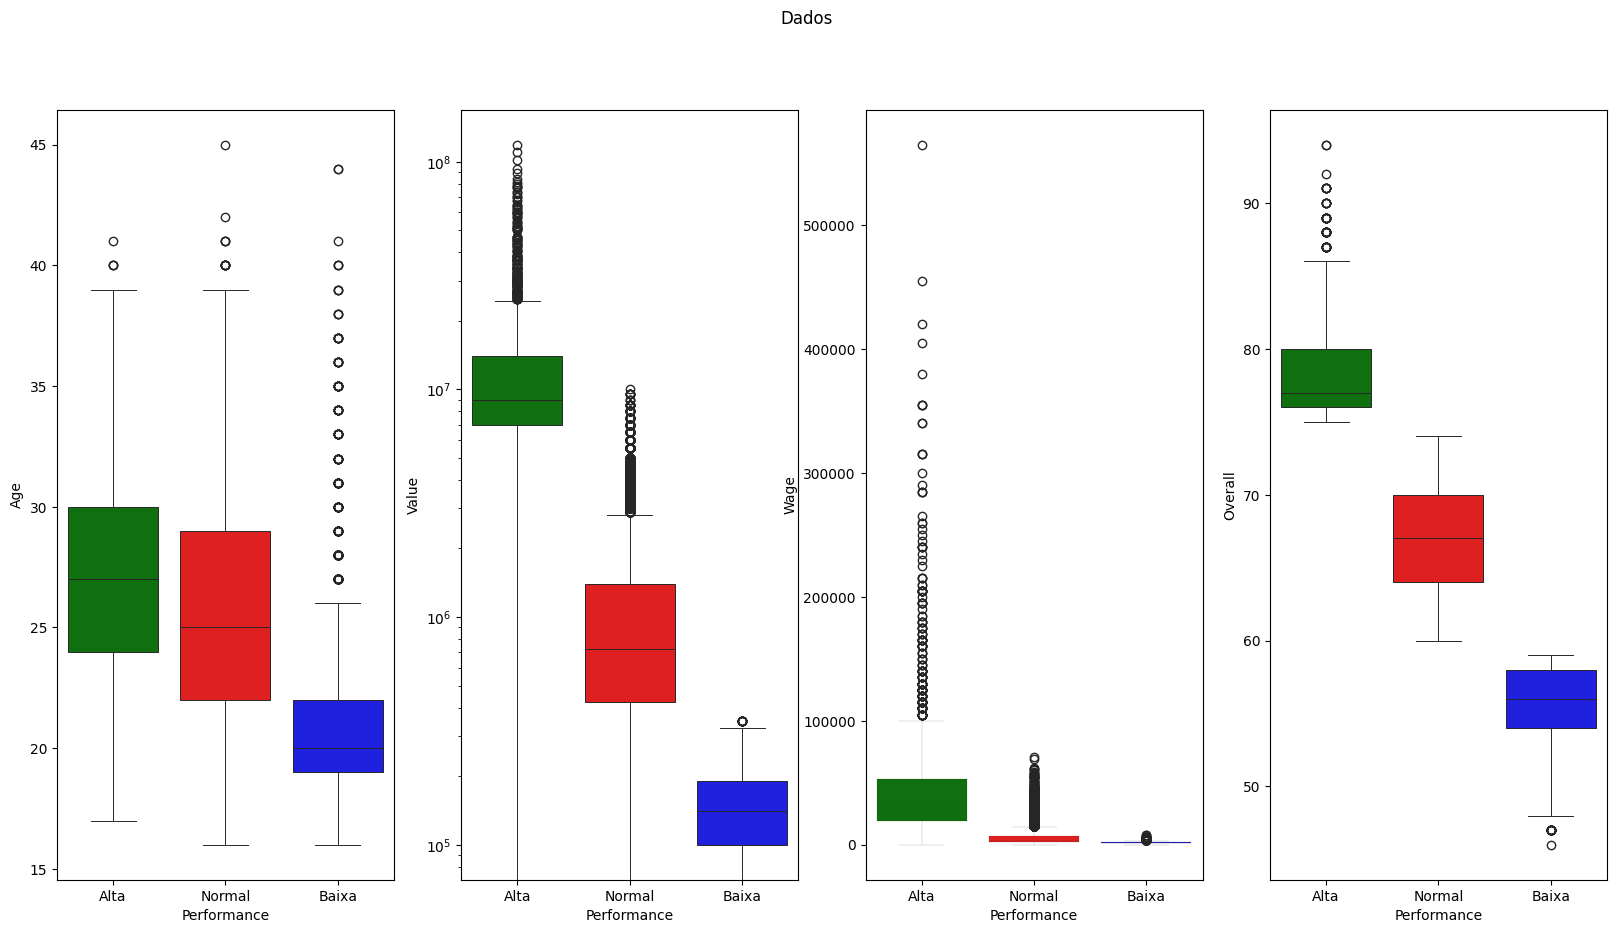

In [11]:
# Coloque seu código aqui
#axes[1].set_yscale('log') Pode ajudar a modificar a escala do eixo y quando os valores são muito grandes

fig, axes = plt.subplots(1, 4, figsize=(20, 10))
fig.suptitle("Dados")

sns.boxplot(
    x="Performance",
    hue="Performance",
    legend=False,
    y="Age",
    palette=["g", "r", "b"],
    linewidth=0.7,
    ax=axes[0],
    data=dados2
)

sns.boxplot(
    x="Performance",
    hue="Performance",
    legend=False,
    y="Value",
    palette=["g", "r", "b"],
    linewidth=0.7,
    ax=axes[1],
    data=dados2
)
axes[1].set_yscale('log')

sns.boxplot(
    x="Performance",
    hue="Performance",
    legend=False,
    y="Wage",
    palette=["g", "r", "b"],
    linewidth=0.10,
    ax=axes[2],
    data=dados2
)

sns.boxplot(
    x="Performance",
    hue="Performance",
    legend=False,
    y="Overall",
    palette=["g", "r", "b"],
    linewidth=0.7,
    ax=axes[3],
    data=dados2
)




## Gráfico 1 

<ul style="display:flex; gap: 10px;">
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: green;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 24 a 30 anos tem uma performance alta. As bolinhas desagrupas mostram que ainda existem jogadores com idade entre  40 e 45 com uma performance alt.a
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: red;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 22 a 29 anos tem uma performance normal. As bolinhas desagrupas mostram que ainda existem jogadores com idade entre 40 e 45 com uma performance normal.
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: blue;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 19 a 22 anos tem uma performance baixa. As bolinhas desagrupas mostram que ainda existem jogadores com idade entre 27 e 45 com uma performance baixa.
    </li>
</ul>

## Gráfico 2

<ul style="display:flex; gap: 10px;">
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: green;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        a maioria dos Jogadores com uma performance alta tem os valores entre 1 milhão e 120 milhões . As bolinhas desagrupas mostram que ainda existem jogadores com valores acima de 120 milhões porem não são a maioria
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: red;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        a maioria dos Jogadores com uma performance normal tem os valores entre 700 mil e 10 milhões . As bolinhas desagrupas mostram que ainda existem jogadores com valores acima de 10 milhões porem não são a maioria
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: blue;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
       a maioria dos Jogadores com uma performance baixa tem os valores entre 700 mil e 10 milhões . As bolinhas desagrupas mostram que ainda existem jogadores com valores acima de 10 milhões porem não são a maioria
    </li>
</ul>

## Gráfico 3

<ul style="display:flex; gap: 10px;">
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: green;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores com wage(salário) dentre 10 mil a 50 mil tem uma performance alta. As bolinhas desagrupas mostram que ainda existem jogadores com wage(salário) maiores que 1 0 mil, podendo chegar até 1 milhãocom uma performance <lta<
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: red;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores com wage(salário) dentre 0 a 5 mil tem uma performance normal. As bolinhas desagrupas mostram que ainda existem jogadores com wage(salário) que ultrapassam 5 mil e chegam perto de 90 mil com uma performance alta.
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: blue;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores com wage(salário) dentr 0 a mil tem uma performance baixa. As bolinhas desagrupas mostram que ainda existem jogadores com wage(salário) que ultrapassam mil e chegam perto de 5 mil com uma performance baixa.
    </li>
</ul>

## Gráfico 4

<ul style="display:flex; gap: 10px;">
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: green;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 75 a 80 overall tem uma performance alta. As bolinhas desagrupas mostram que ainda existem jogadores com overall dentre 87 e 90+ com uma performance alta.
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: red;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 22 a 29 overall tem uma performance normal
    </li>
    <li style="display: flex; align-items: center; gap: 8px; font-size: 20px; min-width: 33%;">
        <div style="background-color: blue;  min-width: 24px; max-width: 24px; height: 100%;"></div> 
        Jogadores entre 19 a 22 overall tem uma performance baixa. As bolinhas desagrupas mostram que ainda existem jogadores com overall menor que 46 com uma performance baixa.
    </li>
</ul>


### e) Cálcule a média, desvio padrão e correlação dos **dados totais** e dos **dados agrupados por performace**. O que você pode concluir? <font color='red'>(1.25 pontos)</font>

In [12]:
# Coloque seu código aqui
dados3 = dados2[["Age", "Overall", "Value", "Wage", "Performance"]]
media_totais = dados3[["Age", "Overall", "Value", "Wage"]].mean()
dsp_totais = dados3[["Age", "Overall", "Value", "Wage"]].std()
media_performance = dados3.groupby("Performance").mean()
dsp_performance = dados3.groupby("Performance").std()


In [13]:
print(f"media total\n {media_totais}\n")
print(f"Desvio padrão total\n {dsp_totais}\n")
print(f"media performance\n {media_performance}\n")
print(f"Desvio padrão performance\n {dsp_performance}\n")

media total
 Age        2.512221e+01
Overall    6.623870e+01
Value      2.410696e+06
Wage       9.731312e+03
dtype: float64

Desvio padrão total
 Age        4.669943e+00
Overall    6.908930e+00
Value      5.594933e+06
Wage       2.199929e+04
dtype: float64

media performance
                    Age    Overall         Value          Wage
Performance                                                  
Alta         27.244197  78.091876  1.283535e+07  45300.290135
Baixa        20.834366  55.630165  1.451016e+05   1378.099174
Normal       25.731470  66.714318  1.278932e+06   6006.422365

Desvio padrão performance
                   Age   Overall         Value          Wage
Performance                                                
Alta         3.860264  3.281396  1.177640e+07  49654.181550
Baixa        3.592454  2.903358  6.902050e+04    802.349097
Normal       4.442296  3.906328  1.418784e+06   7326.670513



 ### f) Plote a dispersão e a distribuição das colunas numéricas. <font color='red'>(0.5 ponto)</font>

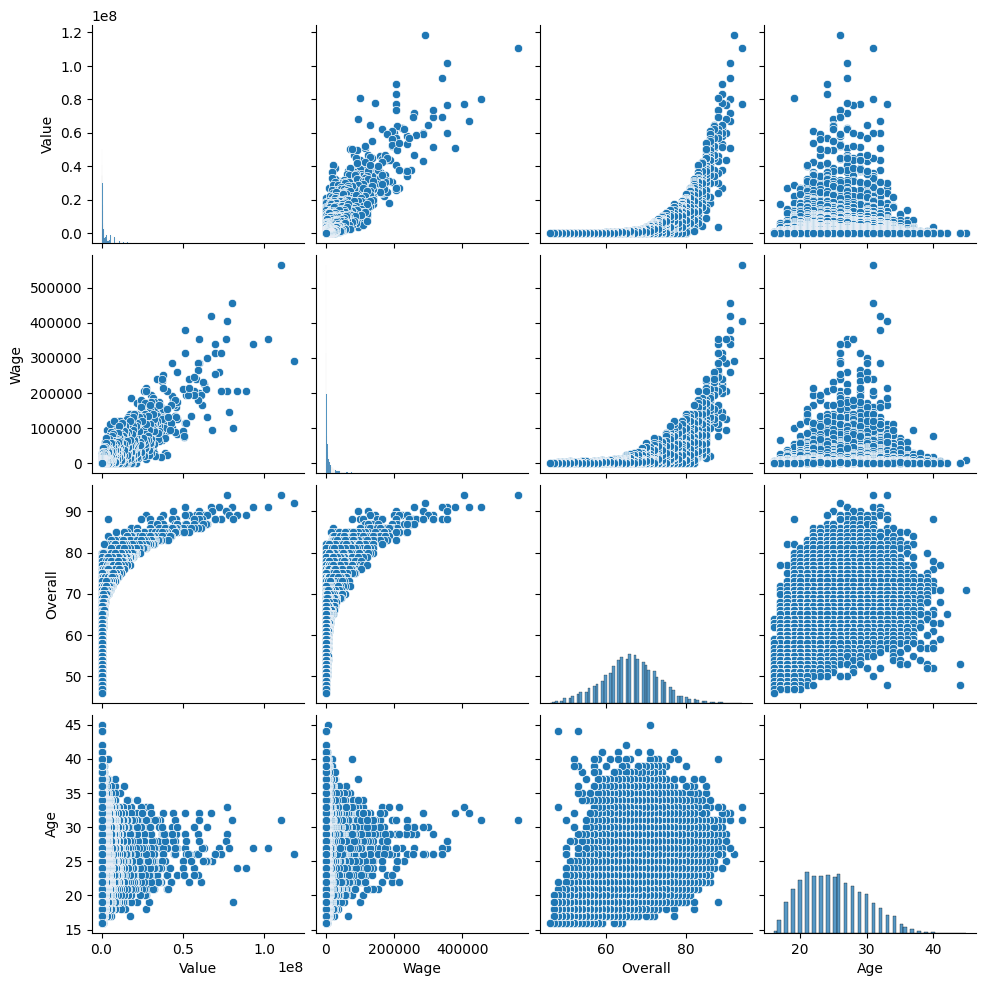

In [14]:
# Coloque seu código aqui
sns.pairplot(dados2[["Value", "Wage", "Overall", "Age"]])

[Text(0.5, 0, 'Idade do Jogador'), Text(0, 0.5, 'Contagem')]

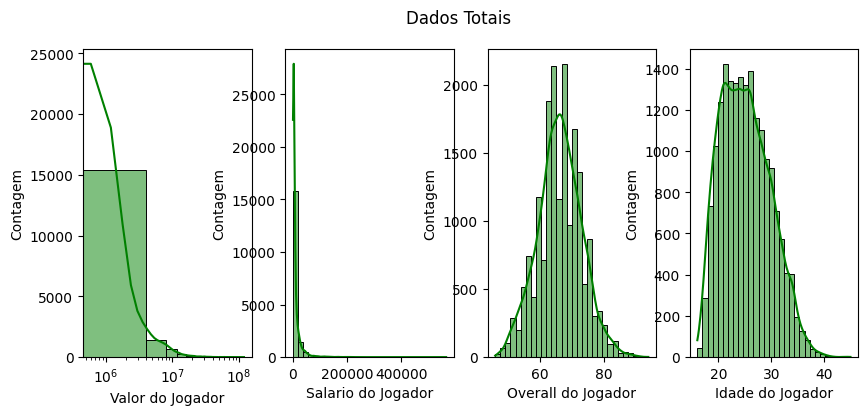

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle('Dados Totais')


sns.histplot(ax=axes[0],
            data=dados2["Value"],
            kde=True,
            bins=30,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[1],
            data=dados2["Wage"],
            kde=True,
            bins=30,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[2],
            data=dados2["Overall"],
            kde=True,
            bins=30,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[3],
            data=dados2["Age"],
            kde=True,
            bins=30,
            linewidth=0.7,
            color='green'
            )

axes[0].set(xlabel='Valor do Jogador', ylabel='Contagem')
axes[0].set_xscale('log')
axes[1].set(xlabel='Salario do Jogador', ylabel='Contagem')
axes[2].set(xlabel='Overall do Jogador', ylabel='Contagem')
axes[3].set(xlabel='Idade do Jogador', ylabel='Contagem')

### g) Separe os jogadores em faixas etarias de 5 anos. Gere uma figura com 3 subplots: os dois primeiros serão boxplots com (a) valor e (b) salario, com o eixo x sendo a faixa de idade; o subplot (c) deve ser uma dispersão dos valores médios de valor em função dos valores médios de idade por faixa etaria. <font color='red'>(1 ponto)</font>


C:\Users\Vinicius-Henrique\AppData\Local\Temp\ipykernel_14184\1391364997.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados3["Age"] = dados3["Age"].apply(altera_idade)


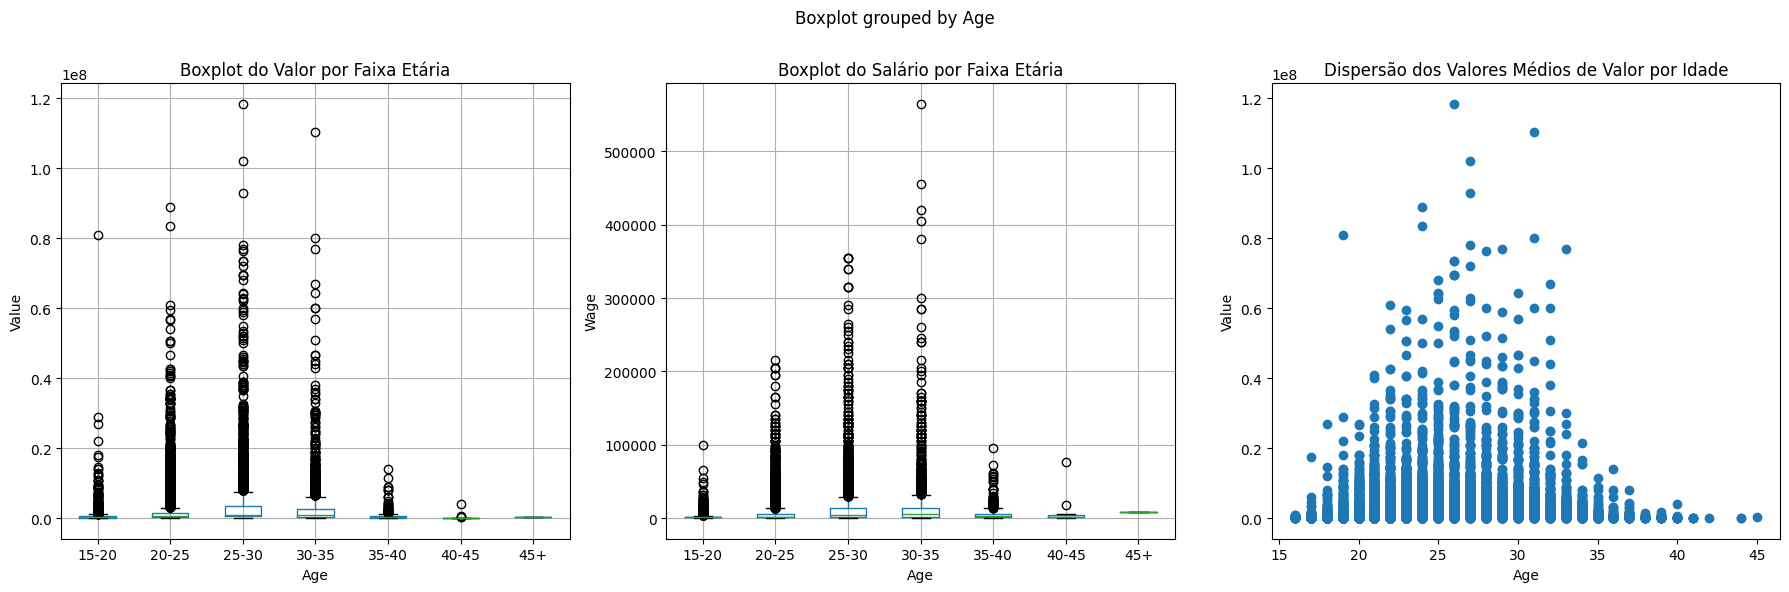

In [16]:
# Coloque seu código aqui
def altera_idade(idade):
    if idade < 20:
        return '15-20'
    elif idade < 25:
        return '20-25'
    elif idade < 30:
        return '25-30'
    elif idade < 35:
        return '30-35'
    elif idade < 40:
        return '35-40'
    elif idade < 45:
        return '40-45'
    return '45+'

dados3 = dados2[["Age", "Value", "Wage"]]

dados3["Age"] = dados3["Age"].apply(altera_idade)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
dados3.boxplot(column='Value', by='Age', ax=axs[0])
axs[0].set_title('Boxplot do Valor por Faixa Etária')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Value')

dados3.boxplot(column='Wage', by='Age', ax=axs[1])
axs[1].set_title('Boxplot do Salário por Faixa Etária')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Wage')

axs[2].scatter(x=dados2['Age'], y=dados2['Value'])
axs[2].set_title('Dispersão dos Valores Médios de Valor por Idade')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

### h) Baseado nas colunas selecionadas e nas estatíticas você é capaz de propor uma estratégia de investimento em jogadores? <font color='red'>(1 ponto)</font>

Dica: lembre-se que para investir você quer comprar um jogador barato (o que significa barato?) e de boa performance, que possa valorizar (para poder valorizar ele pode ser velho? quanto é velho para o futebol?) de forma a ser vendido por um valor maior no futuro. A posição é importante? A nacionalidade é importante? Existe alguma informação adicional que eliminamos no item (a) que poderia ser útil para criar essa estratégia?

In [24]:
# Coloque seu código aqui
# Coloque comentários em markdown sobre sua conclusão

dados2['faixa_etaria'] = (dados2['Age'] // 5) * 5

grouped = dados2.groupby('faixa_etaria')

# Calcular as estatísticas por faixa etária
stats = grouped[['Value', 'Wage']].agg(['mean', 'median', 'std', 'count'])

# Identificar jogadores subvalorizados
dados2['value_to_wage_ratio'] = dados2['Value'] / dados2['Wage']
subvalorizados = dados2[dados2['value_to_wage_ratio'] > dados2['value_to_wage_ratio'].quantile(0.75)]

# Estratégia de investimento
estrategia = {
    'jovens_promissores': dados2[(dados2['Age'] >= 15) & (dados2['Age'] <= 25)],
    'jogadores_experientes': dados2[(dados2['Age'] >= 30) & (dados2['Age'] <= 35)],
    'subvalorizados': subvalorizados
}

for key, value in estrategia.items():
    print(f"\n{key.capitalize()}:")
    print(value[['Age', 'Value', 'Wage', 'value_to_wage_ratio']])


Jovens_promissores:
       Age       Value      Wage  value_to_wage_ratio
9       25  68000000.0   94000.0           723.404255
15      24  89000000.0  205000.0           434.146341
16      24  83500000.0  205000.0           407.317073
25      19  81000000.0  100000.0           810.000000
42      24  57000000.0  205000.0           278.048780
...    ...         ...       ...                  ...
18202   19     60000.0    1000.0            60.000000
18203   19     60000.0    1000.0            60.000000
18204   16     60000.0    1000.0            60.000000
18205   17     60000.0    1000.0            60.000000
18206   16     60000.0    1000.0            60.000000

[10099 rows x 4 columns]

Jogadores_experientes:
       Age        Value      Wage  value_to_wage_ratio
0       31  110500000.0  565000.0           195.575221
1       33   77000000.0  405000.0           190.123457
6       32   67000000.0  420000.0           159.523810
7       31   80000000.0  455000.0           175.824176
8     